# `Mergesort合併排序法`
* **`目的`**`：利用設定之key值將資料做排序`
* **`描述`**`：將大筆資料先進行對半切割成多筆小筆資料，將小筆資料排序後，合併成大筆資料。`
* **`時間複雜度`**`：O(nlgn)`

## `流程圖`

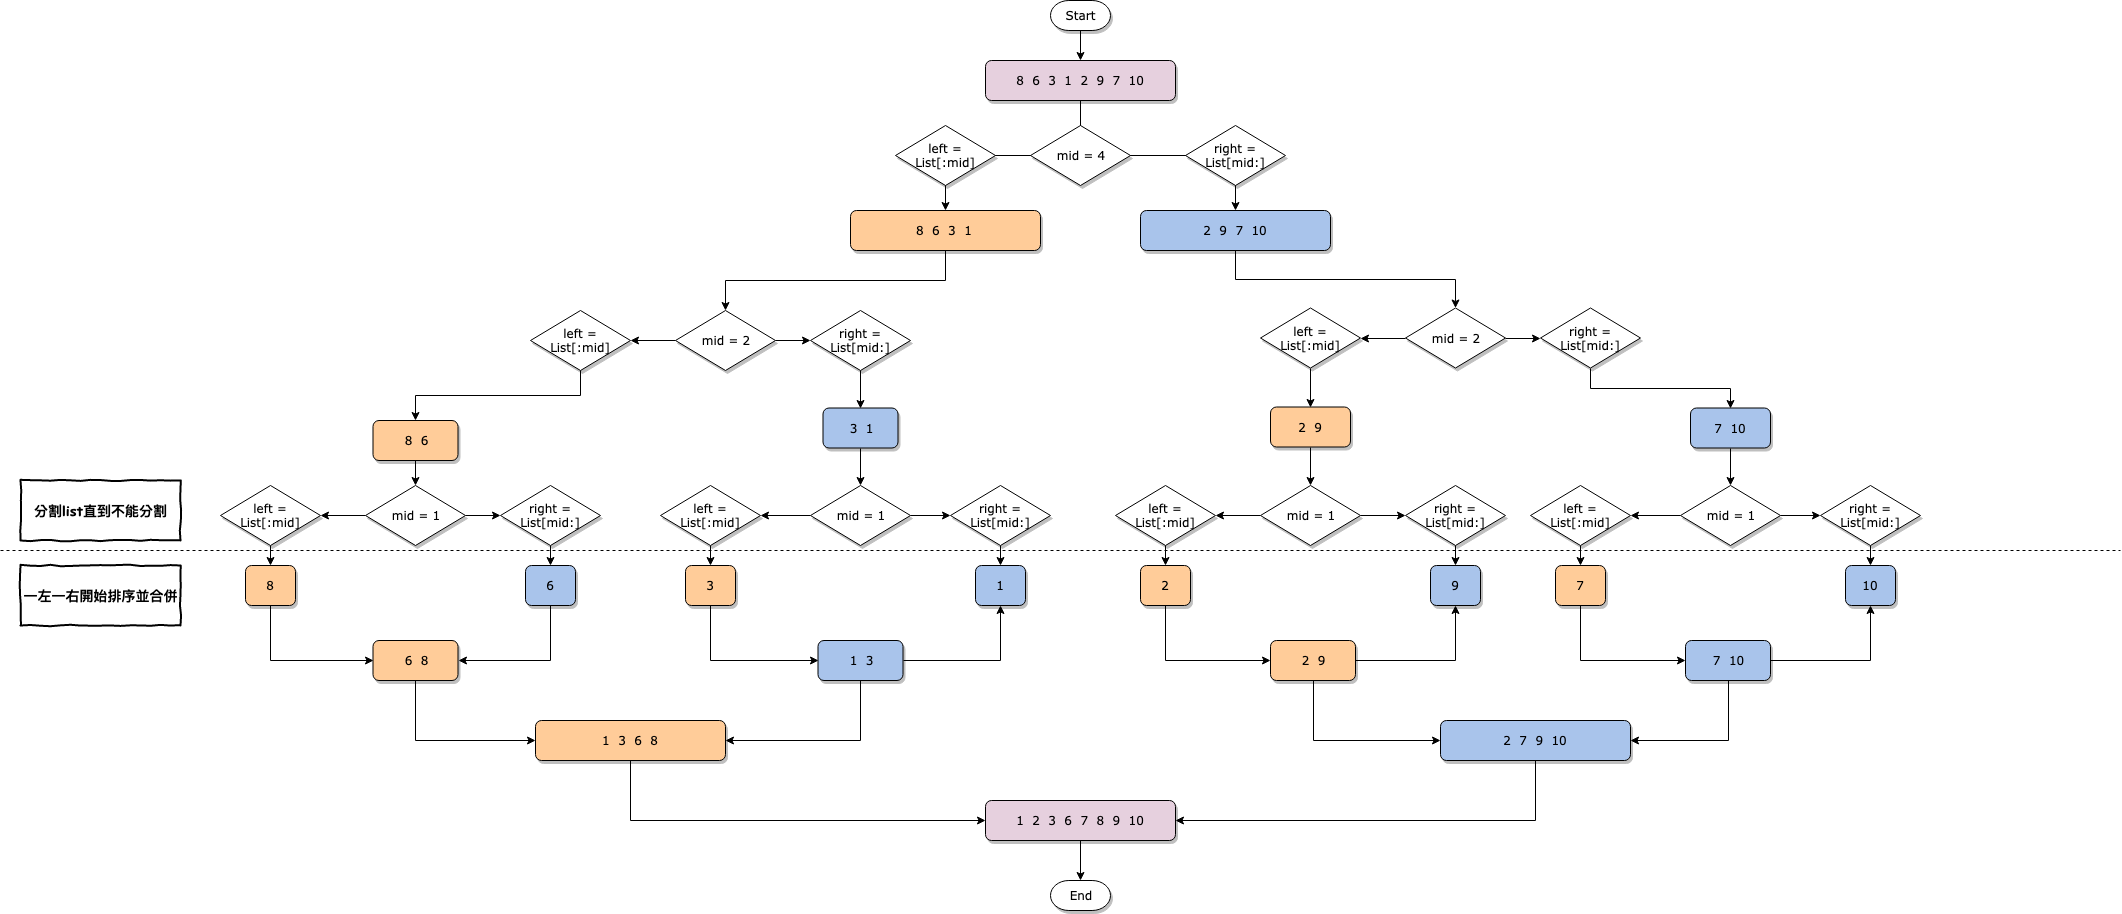

In [1]:
from IPython.display import Image
Image(filename="merge_sort_流程圖.png")

## `程式碼操作` （最終成果在最底端，可直接往下滑～）

### 為了避免先看網站後，思考邏輯被侷限，這次我決定先靠自己想想程式碼該如何寫

_看了課程投影片中的教學影片後，我初步構想 mergesort 主要分成兩步驟：_
1. 若list長度 >= 1，則對半切割 list，左半邊為 left，右半邊為 right。將原本的 list 分割直到不能分割為止。
2. 開始兩兩相鄰的值去比較大小並排序，由左而右，分別從 left 與 right 兩 list 開始相互比較，  
   較小者先放入暫存空間，並將該點的後一位與另一個 list 的點繼續比較大小，  
   從一個一個合併成兩個兩個，  
   兩個兩個再合併成四個四個......，  
   最後合併成一個完整的 list。  
3. 重複循環並比較，直到排序完成，再度合併成一個 list。

In [5]:
#1. 先做分割list的部分

def halfcut(List):
    if len(List)>=1:
        mid = len(List)//2 # 取中間值mid，//符號是為了取未包含小數點的值，ex：3//2 = 1
        left = List[0:mid]  # left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
        right = List[mid:len(List)+1]  # right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）

In [6]:
#2. 再來做合併的部分

def Merge_sort(List): 
    while len(List)>1:  #當list長度>1時執行下面動作
        left = halfcut(List)
        right = halfcut(List)
    
        ans = [] #先設定一個list暫存我們排序後的答案
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0: #當left與right長度皆大於0時
            #比較left與right中最左邊點的大小
            if left[l]<right[r]: #若left的點<right的點，則在我們的ans中加入left的該點
                ans.append(left.pop(0))
            if left[l]>right[r]: #若left的點>right的點，則在我們的ans中加入right的該點
                ans.append(right.pop(0))
        while len(left)>0: #當只有left長度大於0時
            ans.append(left.pop(0)) #在ans中加入left的點
        while len(right)>0: #當只有right長度大於0時
            ans.append(right.pop(0)) #在ans中加入right的點
    return ans

In [7]:
print(Merge_sort([2,5,3,4,1]))

TypeError: object of type 'NoneType' has no len()

### `TypeError: object of type 'NoneType' has no len()`
第一次作業好像出現過這個錯誤，那時候上網查發現原因是因遞迴邏輯錯誤，  
造成python無法判斷list的長度，也就是說對於python，list在此時是未知的東西，無法去判斷長度。  
`解決辦法：先一步一步看看程式碼哪裡錯誤，再看看是不是要將left跟right分割的def分成兩個來寫`

In [8]:
a = [2,5,3,4,1]
print("left:",halfcut(a))
print("right:",halfcut(a))

left: None
right: None


看來list果然皆為空...  
試試看將halfcut分成兩個部分寫好了，  
讓python更明確知道left是什麼、right是什麼。  

In [9]:
# 1. 將list對半切割，此為左半邊left
def halfcut_left(List):
    if len(List)>=1:
        mid = len(List)//2
        left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）

# 2. 將list對半切割，此為右半邊right
def halfcut_right(List):
    if len(List)>=1:
        mid = len(List)//2
        right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）

In [10]:
# 3. 再來做合併的部分

def Merge_sort(List):
    while len(List)>1:
        left = halfcut_left(List)
        right = halfcut_right(List)
    
        ans = [] #先設定一個list暫存我們排序後的答案
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0:
            if left[l]<right[r]:
                ans.append(left.pop(0))
            if left[l]>right[r]:
                ans.append(right.pop(0))
        while len(left)>0:
            ans.append(left.pop(0))
        while len(right)>0:
            ans.append(right.pop(0))
    return ans

In [11]:
print(Merge_sort([2,5,3,4,1]))

TypeError: object of type 'NoneType' has no len()

In [12]:
a = [2,5,3,4,1]
print("left:",halfcut_left(a))
print("right:",halfcut_right(a))

left: None
right: None


此時list還是空值！  
回頭看看程式碼，懷疑可能是進入另一個def後，如果沒有return結果，  
那回到原本的def可能就還是會不知道所謂left或right是什麼  
`解決辦法：試試看在def中加入return`

In [13]:
def halfcut_left(List):
    if len(List)>=1:
        mid = len(List)//2
        left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
    return left
def halfcut_right(List):
    if len(List)>=1:
        mid = len(List)//2
        right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
    return right

In [14]:
#2. 再來做合併的部分

def Merge_sort(List):
    if len(List)>1:
        left = halfcut_left(List)
        right = halfcut_right(List)
    
        ans = [] #先設定一個list暫存我們排序後的答案
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0:
            if left[l]<right[r]:
                ans.append(left.pop(0))
            if left[l]>right[r]:
                ans.append(right.pop(0))
        while len(left)>0:
            ans.append(left.pop(0))
        while len(right)>0:
            ans.append(right.pop(0))
    return ans

In [15]:
print(Merge_sort([2,5,3,4,1]))

[2, 3, 4, 1, 5]


In [16]:
a = [2,5,3,4,1]
print("left:",halfcut_left(a))
print("right:",halfcut_right(a))

left: [2, 5]
right: [3, 4, 1]


先檢查原本的錯誤已經被解決了，left 與 right 中皆不為空值！  
該試試看把遞迴加入程式碼了，如此才能看出程式碼能否繼續遞迴排序成功～  
**`因為Mergesort的邏輯是先將list分割至不能分割才開始排序，所以我將recursive加在排序前試試看`**

In [17]:
def halfcut_left(List):
    if len(List)>=1:
        mid = len(List)//2
        left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
    return left
def halfcut_right(List):
    if len(List)>=1:
        mid = len(List)//2
        right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
    return right

In [18]:
#2. 再來做合併的部分

def Merge_sort(List):
    ans = [] #先設定一個list暫存我們排序後的答案
    if len(List)>1:
        left = halfcut_left(List)
        right = halfcut_right(List)

        Merge_sort(left)     
        Merge_sort(right)
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0:
            if left[l]<right[r]:
                ans.append(left.pop(0))
            if left[l]>right[r]:
                ans.append(right.pop(0))
        while len(left)>0:
            ans.append(left.pop(0))
        while len(right)>0:
            ans.append(right.pop(0))
    return ans

In [19]:
print(Merge_sort([2,5,3,4,1]))

IndexError: list index out of range

### `IndexError: list index out of range`
從這個錯誤來看，我們在 if 判斷的時候 list 長度會出現問題，  
那試試看在 append 完之後加個 if 判斷式，檢查一下 list 長度是否還大於0，  
若<=0，則 break 跳出該程式。

In [20]:
def halfcut_left(List):
    if len(List)>=1:
        mid = len(List)//2
        left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
    return left
def halfcut_right(List):
    if len(List)>=1:
        mid = len(List)//2
        right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
    return right

In [21]:
#2. 再來做合併的部分

def Merge_sort(List):
    if len(List)<=1:
        return List
    ans = [] #先設定一個list暫存我們排序後的答案
    if len(List)>1:
        left = halfcut_left(List)
        right = halfcut_right(List)

        Merge_sort(left)     
        Merge_sort(right)
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0:
            if left[l]<right[r]:
                ans.append(left.pop(0))
                if len(left)<=0: #加入判斷式，再次確認是否list尚有數值
                    break
            if left[l]>right[r]:
                ans.append(right.pop(0))
                if len(right)<=0: #加入判斷式，再次確認是否list尚有數值
                    break
        while len(left)>0:
            ans.append(left.pop(0))
            left = Merge_sort(left)
        while len(right)>0:
            ans.append(right.pop(0))
            right = Merge_sort(right)
        
    return ans

In [22]:
print(Merge_sort([2,5,3,4,1]))

[2, 3, 4, 1, 5]


終於沒有error了，但是似乎recursive出了點問題＠＠  
還沒完全排序完全，就輸出結果了，所以來檢查一下recursive的地方～  

In [23]:
def halfcut_left(List):
    if len(List)>=1:
        mid = len(List)//2
        left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
    return left
def halfcut_right(List):
    if len(List)>=1:
        mid = len(List)//2
        right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
    return right

In [24]:
#2. 再來做合併的部分

def Merge_sort(List):
    if len(List)<=1:
        return List
    ans = [] #先設定一個list暫存我們排序後的答案
    if len(List)>1:
        left = halfcut_left(List)
        right = halfcut_right(List)

        left = Merge_sort(left)     # recursive時要記得設回left與right變數，下次執行時才會用新的left與right執行～
        right = Merge_sort(right)
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0:
            if left[l]<right[r]:
                ans.append(left.pop(0))
                if len(left)<=0:
                    break
            if left[l]>right[r]:
                ans.append(right.pop(0))
                if len(right)<=0:
                    break
        while len(left)>0:
            ans.append(left.pop(0))
            left = Merge_sort(left)
        while len(right)>0:
            ans.append(right.pop(0))
            right = Merge_sort(right)
        
    return ans

In [25]:
print(Merge_sort([2,5,3,4,1]))

[1, 2, 3, 4, 5]


## 終於出來了！！
原來是 recursive 完後，忘記再將它指定回 left 與 right ，  
導致程式碼再遞迴時，不知道left與right為何><  

## 測試看看有重複數值的測值～

In [26]:
print(Merge_sort([2,2,1,3,2,5,3,4,1]))

KeyboardInterrupt: 

發現程式碼是不能執行成功的QQ  他無法停止執行，所以只好先shutdown了，  
突然想到當初寫的時候好像忘了考慮若List為空，以及若List中有數值重複的情況了！  
趕緊回去加一下～

In [27]:
def halfcut_left(List):
    if len(List)>=1:
        mid = len(List)//2
        left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
    return left
def halfcut_right(List):
    if len(List)>=1:
        mid = len(List)//2
        right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
    return right

In [28]:
#2. 再來做合併的部分

def Merge_sort(List):
    if len(List)<=1: # 加入list長度小於等於1時的情形
        return List
    ans = [] #先設定一個list暫存我們排序後的答案
    if len(List)>1:
        left = halfcut_left(List)
        right = halfcut_right(List)

        left = Merge_sort(left)     # recursive時要記得設回left與right變數，下次執行時才會用新的left與right執行～
        right = Merge_sort(right)
    
        l = 0
        r = 0
    
        while len(left)>0 and len(right)>0:
            if left[l]<right[r]:
                ans.append(left.pop(0))
                if len(left)<=0:
                    break
            if left[l]>right[r]:
                ans.append(right.pop(0))
                if len(right)<=0:
                    break
            if left[l]==right[r]:  # 加入left與right點若值相同時的情形
                ans.append(right.pop(0))
                if len(right)<=0:
                    break
        while len(left)>0:
            ans.append(left.pop(0))
            left = Merge_sort(left)
        while len(right)>0:
            ans.append(right.pop(0))
            right = Merge_sort(right)
        
    return ans

In [29]:
print(Merge_sort([2,2,1,3,2,5,3,4,1]))

[1, 1, 2, 2, 2, 3, 3, 4, 5]


In [30]:
print(Merge_sort([ ]))

[]


In [31]:
print(Merge_sort([2,-1,-4,3,7,2,1,0,10]))

[-4, -1, 0, 1, 2, 2, 3, 7, 10]


## 終於成功了！測試了幾種老師提點的測值情況，這次是真的成功了！！（淚流滿面）

# 完整程式碼

In [32]:
class Solution(object):
    
#1. 先做list的分割，這裡是left的部分～

    def halfcut_left(List):
        if len(List)>=1: #若list長度>=1時則進行分割
            mid = len(List)//2 #取mid中間值
            left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
        return left
    
    
#1. 先做list的分割，這裡是right的部分～

    def halfcut_right(List):
        if len(List)>=1: #若list長度>=1時則進行分割
            mid = len(List)//2 #取mid中間值
            right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
        return right
    
    
#2. 再來做合併的部分

    def Merge_sort(self,List):
        if len(List)<=1: #若list長度<=1則直接回傳list
            return List
        ans = [] #先設定一個list暫存我們排序後的答案
        if len(List)>1: #若list長度>1時，則重複呼叫並執行切割的def
            left = halfcut_left(List)
            right = halfcut_right(List)

            left = Merge_sort(left)     # recursive時要記得設回left與right變數，下次執行時才會用新的left與right執行～
            right = Merge_sort(right)
    
            l = 0
            r = 0
    
            while len(left)>0 and len(right)>0: # 若left與right兩個list的長度皆大於0，則開始比較left與right最左邊值的大小
                if left[l]<right[r]: # 若left的值<right的值，則在ans中append該left點
                    ans.append(left.pop(0))
                    if len(left)<=0: # 當append完成後left長度<=0時則break跳出程式
                        break
                if left[l]>right[r]: # 若left的值>right的值，則在ans中append該right點
                    ans.append(right.pop(0))
                    if len(right)<=0: # 當append完成後right長度<=0時則break跳出程式
                        break
                if left[l]==right[r]: # 若left的值=right的值，則在ans中append該right點（此處亦可改成left，沒有影響）
                    ans.append(right.pop(0))
                    if len(right)<=0: # 同樣檢查當append完成後right長度<=0時則break跳出程式
                        break
            while len(left)>0: # 當只有left長度>0時，
                ans.append(left.pop(0)) # 在ans加入剩下的left值
                left = Merge_sort(left)
            while len(right)>0: # 當只有right長度>0時，
                ans.append(right.pop(0)) # 在ans加入剩下的right值
                right = Merge_sort(right)
        
        return ans

In [33]:
output = Solution().Merge_sort([3,2,-4,6,4,2,19])
output

[-4, 2, 2, 3, 4, 6, 19]

In [34]:
output = Solution().Merge_sort([])
output

[]

In [35]:
output = Solution().Merge_sort([2,2,1,3,3,3,4,-5,0,7,10,8])
output

[-5, 0, 1, 2, 2, 3, 3, 3, 4, 7, 8, 10]

### 終於成功了，我愛 mergesort ！！！！XDD

## 最後，將程式碼改成老師與助教規定的格式，就大功告成拉～（感動）

In [80]:
class Solution(object):
    
#1. 先做list的分割，這裡是left的部分～

    def halfcut_left(self,List):
        if len(List)>=1: #若list長度>=1時則進行分割
            mid = len(List)//2 #取mid中間值
            left = List[0:mid]  #left這個list為list對半切割後的左半邊（從第一個到我們取的中間值mid）
        return left
    
    
#1. 先做list的分割，這裡是right的部分～

    def halfcut_right(self,List):
        if len(List)>=1: #若list長度>=1時則進行分割
            mid = len(List)//2 #取mid中間值
            right = List[mid:len(List)+1]  #right這個list為list對半切割後的右半邊（從中間值mid的下一位到最後一個值）
        return right
    
    
#2. 再來做合併的部分

    def merge_sort(self,List):
        
        if len(List)<=1: #若list長度<=1則直接回傳list
            return List
        
        ans = [] #先設定一個list暫存我們排序後的答案
        
        if len(List)>1: #若list長度>1時，則重複呼叫並執行切割的def
            left = self.halfcut_left(List)
            right = self.halfcut_right(List)

            left = self.merge_sort(left)     # recursive時要記得設回left與right變數，下次執行時才會用新的left與right執行～
            right = self.merge_sort(right)
    
            l = 0
            r = 0
    
            while len(left)>0 and len(right)>0: # 若left與right兩個list的長度皆大於0，則開始比較left與right最左邊值的大小
                if left[l]<right[r]: # 若left的值<right的值，則在ans中append該left點
                    ans.append(left.pop(0))
                    if len(left)<=0: # 當append完成後left長度<=0時則break跳出程式
                        break
                if left[l]>right[r]: # 若left的值>right的值，則在ans中append該right點
                    ans.append(right.pop(0))
                    if len(right)<=0: # 當append完成後right長度<=0時則break跳出程式
                        break
                if left[l]==right[r]: # 若left的值=right的值，則在ans中append該right點（此處亦可改成left，沒有影響）
                    ans.append(right.pop(0))
                    if len(right)<=0: # 同樣檢查當append完成後right長度<=0時則break跳出程式
                        break
                        
            while len(left)>0: # 當只有left長度>0時，
                ans.append(left.pop(0)) # 在ans加入剩下的left值
                left = self.merge_sort(left)
                
            while len(right)>0: # 當只有right長度>0時，
                ans.append(right.pop(0)) # 在ans加入剩下的right值
                right = self.merge_sort(right)
        
        return ans

In [82]:
output = Solution().merge_sort([3,2,-4,6,4,2,19])
output2 = Solution().merge_sort([])
output3 = Solution().merge_sort([2,2,1,3,3,3,4,-5,0,7,10,8])
print(output)
print(output2)
print(output3)

[-4, 2, 2, 3, 4, 6, 19]
[]
[-5, 0, 1, 2, 2, 3, 3, 3, 4, 7, 8, 10]


## 參考資料

https://blog.csdn.net/asdfg34rt/article/details/79143177  
http://alrightchiu.github.io/SecondRound/comparison-sort-merge-sorthe-bing-pai-xu-fa.html  
https://www.slideshare.net/MJabin/merge-sort-and-quick-sort  
https://www.c-programming-simple-steps.com/merge-sort.html  